In [77]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [80]:
sales_of_company_x = pd.read_csv("C:/Users/kuznecov.ap/Desktop/временные ряды/1._Лекция/Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("C:/Users/kuznecov.ap/Desktop/временные ряды/1._Лекция/Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("C:/Users/kuznecov.ap/Desktop/временные ряды/1._Лекция/Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("C:/Users/kuznecov.ap/Desktop/временные ряды/1._Лекция/Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("C:/Users/kuznecov.ap/Desktop/временные ряды/1._Лекция/Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("C:/Users/kuznecov.ap/Desktop/временные ряды/1._Лекция/Series/daily-total-female-births-in-cal.csv")

In [81]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

# 1. Проверка на стационарность Тест Дики-Фуллера и Коррелограммы. Приведение ряда к стационарному виду

In [82]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [83]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [84]:
################
 # Коррелограммы
##################
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

### 1.1. Ряд "Monthly sales of company X"

In [85]:
test_stationarity(all_series["Monthly sales of company X"])

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\kuznecov.ap\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


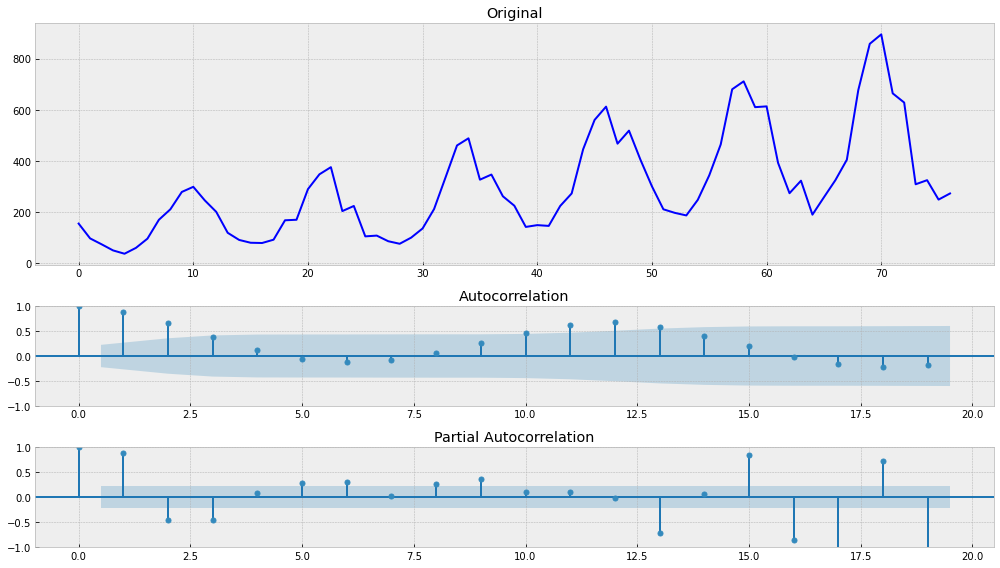

In [86]:
tsplot(all_series["Monthly sales of company X"])

Ряд "Monthly sales of company X"- не стационарный, т.к.  тест Dickey-Fuller показывает значение p-value 0.988889 (больше 5%). Визуально наблюдаем тренд и сезонность. Коррелограмма, так же показывает выходы ACF@ PACF за доверительный интервал и ACF плавно затухают...

In [87]:
series = pd.read_csv("C:/Users/kuznecov.ap/Desktop/временные ряды/1._Лекция/Series/monthly-sales-of-company-x-jan-6.csv")['Count']

Уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [88]:
series = boxcox(series, 0)

C:\Users\kuznecov.ap\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


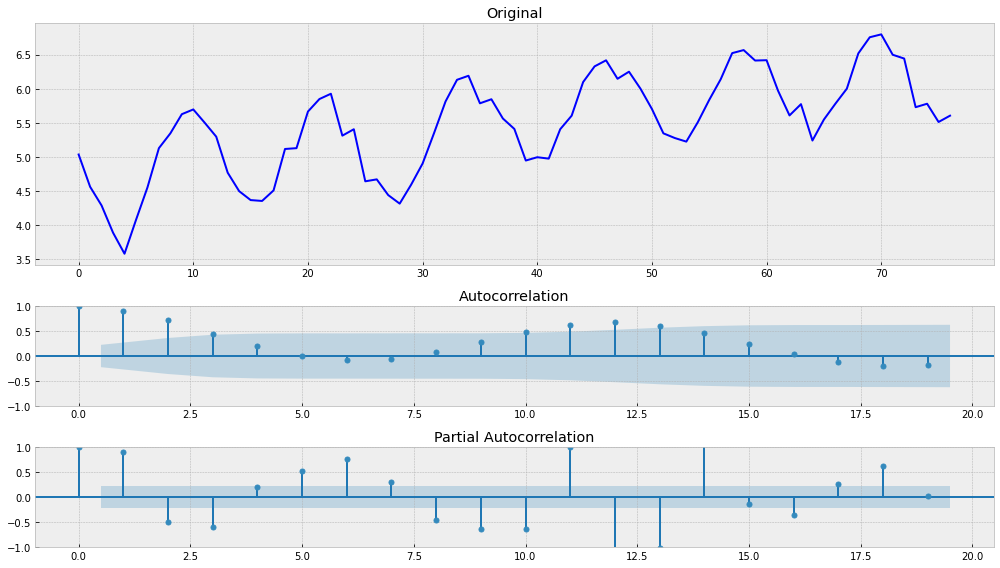

In [89]:
tsplot(series)
test_stationarity(series)

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [90]:
series = np.diff(series, 1)

C:\Users\kuznecov.ap\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


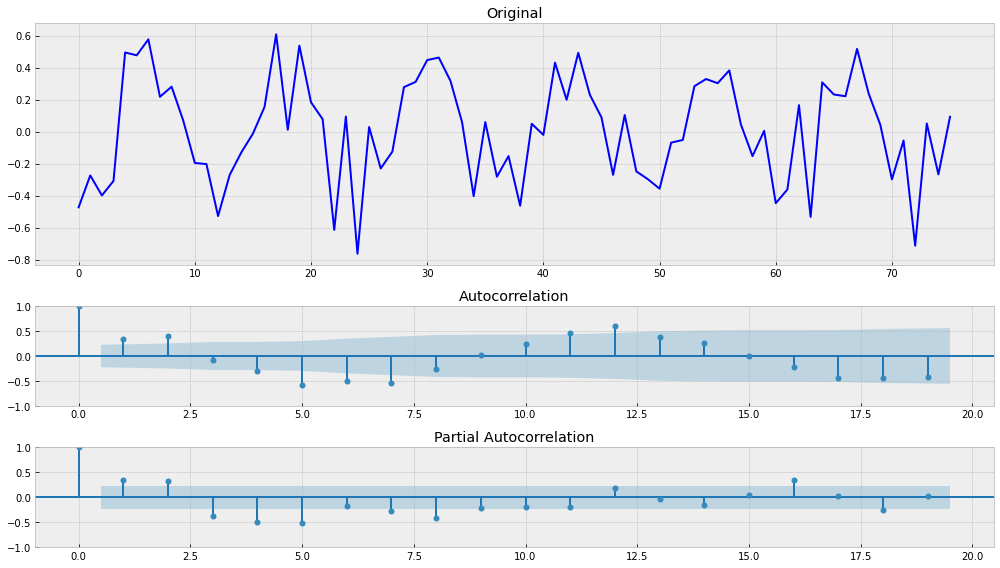

In [91]:
tsplot(series)
test_stationarity(series)

Тест Дикки-Фуллера отвергает нулевую гипотезу о нестационарности ряда. Ряд стационарен!!!

### 2.2. Ряд "Monthly Boston armed robberies"

In [28]:
test_stationarity(all_series["Monthly Boston armed robberies"])

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


C:\Users\kuznecov.ap\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


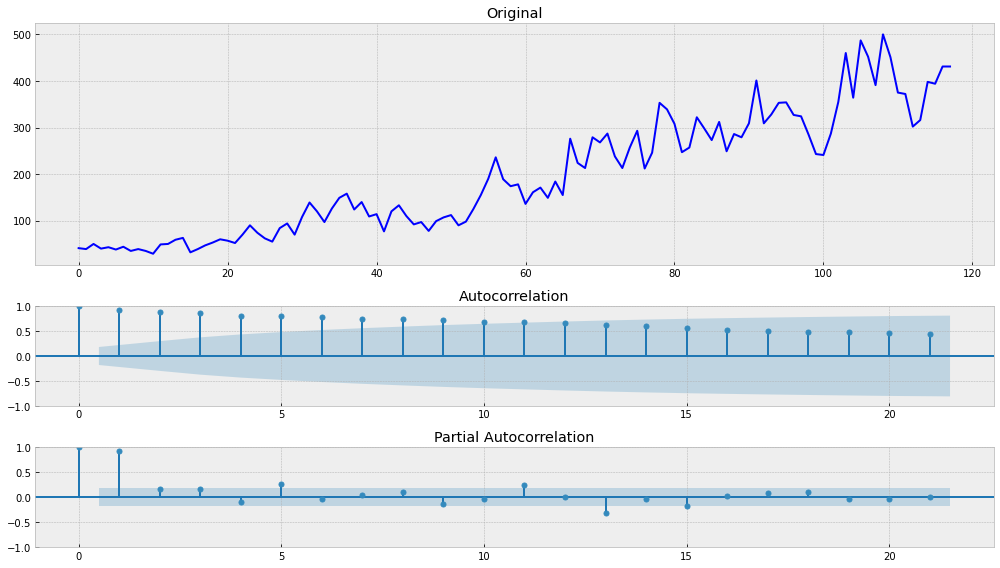

In [41]:
tsplot(all_series["Monthly Boston armed robberies"])

Ряд "Monthly Boston armed robberies"- не стационарный, т.к.  тест Dickey-Fuller показывает значение p-value 0.994278 (больше 5%). Визуально наблюдаем тренд и сезонность.Коррелограмма, так же показывает выходы ACF@ PACF за доверительный интервал и ACF плавно затухают, а PACF имеют два первых выброки и дальше затухание ...

In [99]:
series_1 = pd.read_csv("C:/Users/kuznecov.ap/Desktop/временные ряды/1._Лекция/Series/monthly-boston-armed-robberies-j.csv")['Count']

Уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [93]:
series_1 = boxcox(series_1, 0)

C:\Users\kuznecov.ap\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


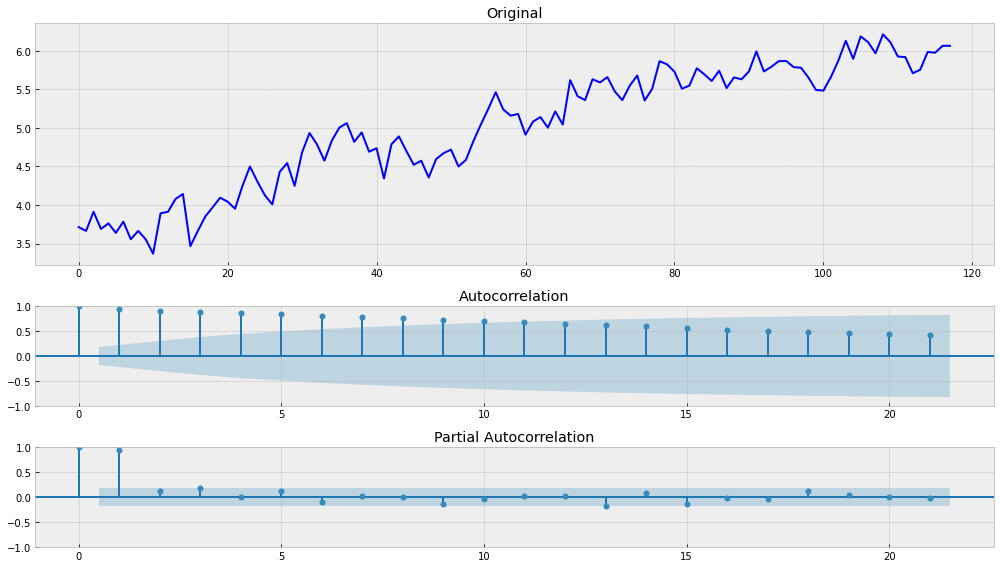

In [95]:
tsplot(series_1)
test_stationarity(series_1)

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [97]:
series_1 = np.diff(series_1, 1)

C:\Users\kuznecov.ap\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


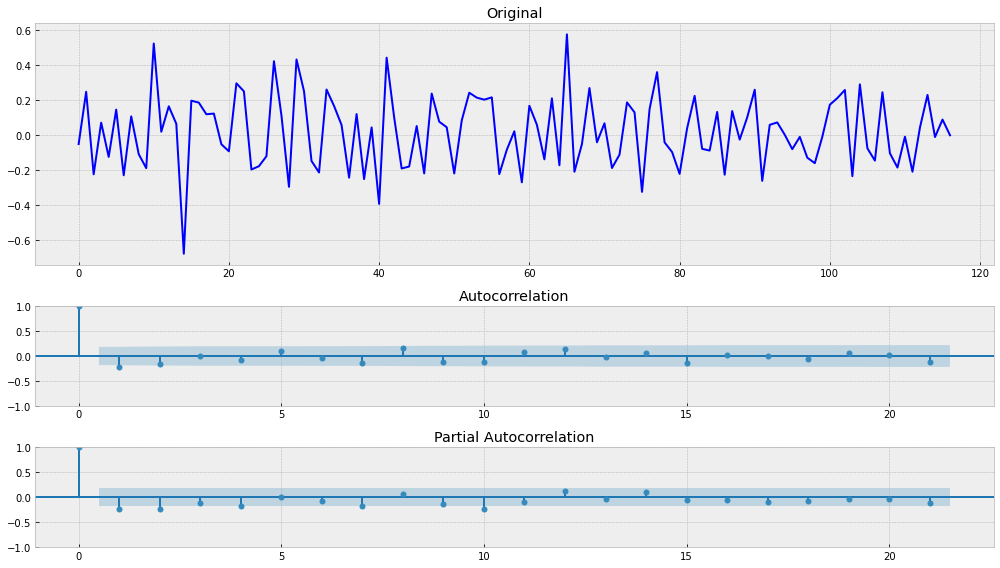

In [98]:
tsplot(series_1)
test_stationarity(series_1)

Тест Дикки-Фуллера отвергает нулевую гипотезу о нестационарности ряда. Ряд стационарен!!!

### 2.3. Ряд "International airline passengers"

In [32]:
test_stationarity(all_series["International airline passengers: monthly totals in thousands"])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


C:\Users\kuznecov.ap\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


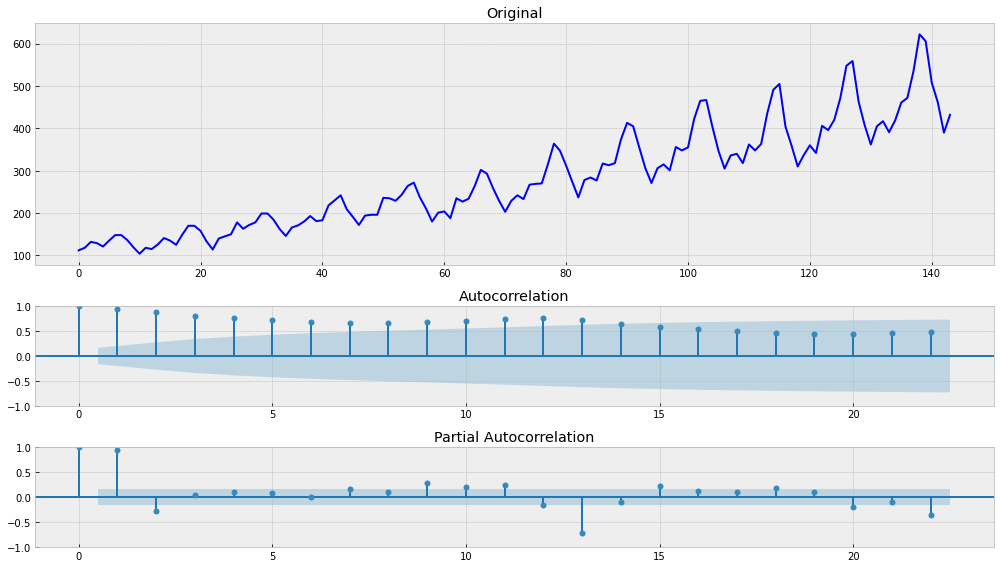

In [43]:
tsplot(all_series["International airline passengers: monthly totals in thousands"])

Ряд "International airline passengers"- не стационарный, т.к.  тест Dickey-Fuller показывает значение p-value 0.991880 (больше 5%). Визуально наблюдаем тренд и сезонность. Коррелограмма, так же показывает выходы ACF@ PACF за доверительный интервал и ACF плавно затухают, а PACF имеют два первых выброки и дальше затухание ...

In [117]:
series_2 = pd.read_csv("C:/Users/kuznecov.ap/Desktop/временные ряды/1._Лекция/Series/international-airline-passengers.csv")['Count']

Уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [118]:
series_2 = boxcox(series_2, 0)

C:\Users\kuznecov.ap\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


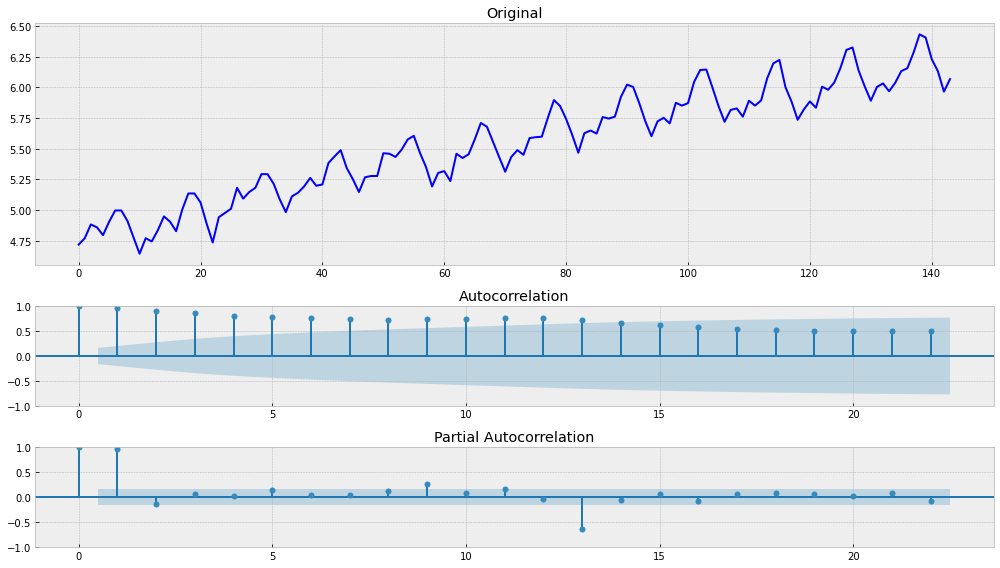

In [119]:
tsplot(series_2)
test_stationarity(series_2)

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [120]:
series_2 = np.diff(series_2)

C:\Users\kuznecov.ap\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


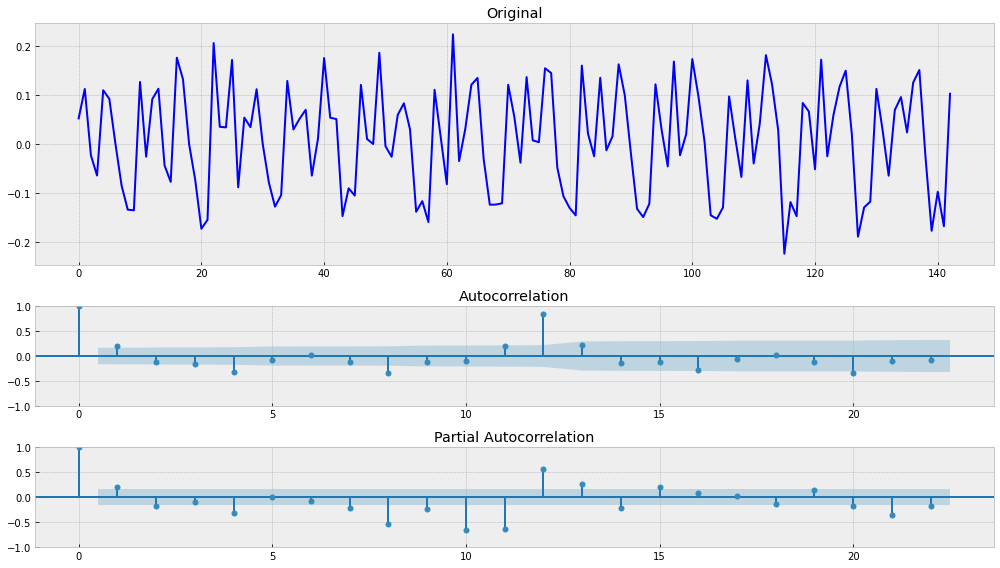

In [121]:
tsplot(series_2)
test_stationarity(series_2)

Тест Дикки-Фуллера не отвергает нулевую гипотезу о нестационарности ряда. Ряд не стационарен. Проведем еще раз диффефренцирование

C:\Users\kuznecov.ap\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Results of Dickey-Fuller Test:
Test Statistic                -9.824011e+00
p-value                        5.246133e-17
#Lags Used                     1.400000e+01
Number of Observations Used    1.260000e+02
Critical Value (1%)           -3.483346e+00
Critical Value (5%)           -2.884766e+00
Critical Value (10%)          -2.579156e+00
dtype: float64


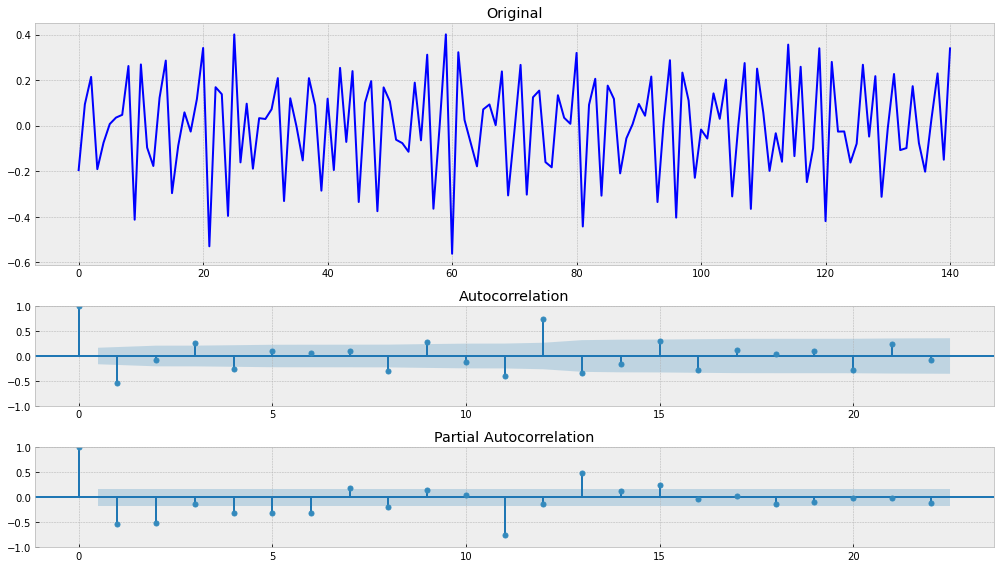

In [129]:
series_2 = np.diff(series_2)
tsplot(series_2)
test_stationarity(series_2)

Тест Дикки-Фуллера отвергает нулевую гипотезу о нестационарности ряда. Ряд стационарен!!!

### 2.4. Ряд "Mean monthly air temperature (Deg. F) Nottingham Castle"

In [33]:
test_stationarity(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


C:\Users\kuznecov.ap\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


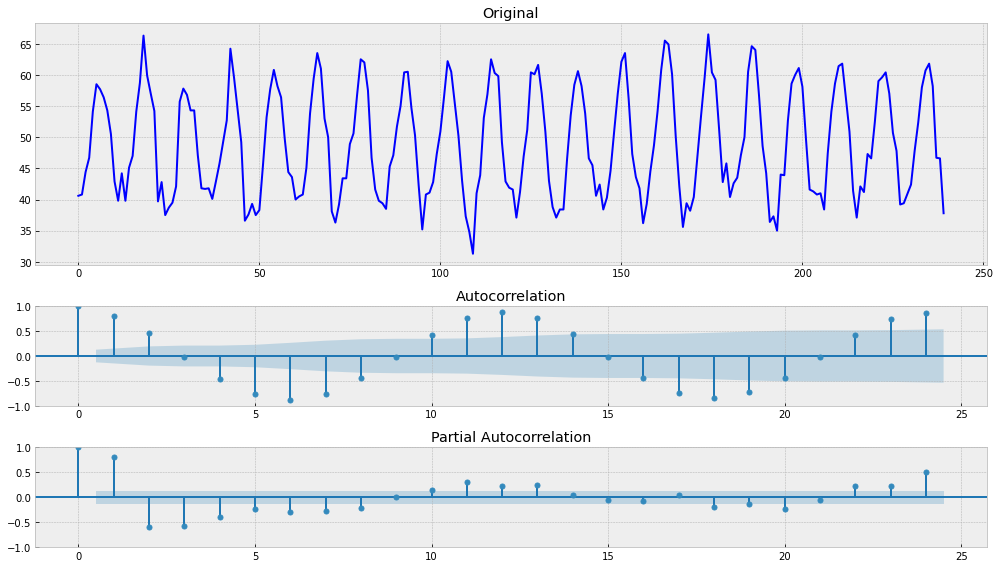

In [42]:
tsplot(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

Ряд "Mean monthly air temperature (Deg. F) Nottingham Castle"-  стационарный!!!, т.к.  тест Dickey-Fuller показывает значение p-value 0.016989(что ниже 5%). Визуально нет тренда и сезонности. Коррелограмма показывает  ACF@ PACF имеют графики, которые характеризую ряды, как стационарные. Первы два выброса, а дальше идут разбросы в разные стороны от оси.

### 2.5. Ряд "Weekly closings of the Dow-Jones industrial average"

In [34]:
test_stationarity(all_series["Weekly closings of the Dow-Jones industrial average"])

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


C:\Users\kuznecov.ap\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


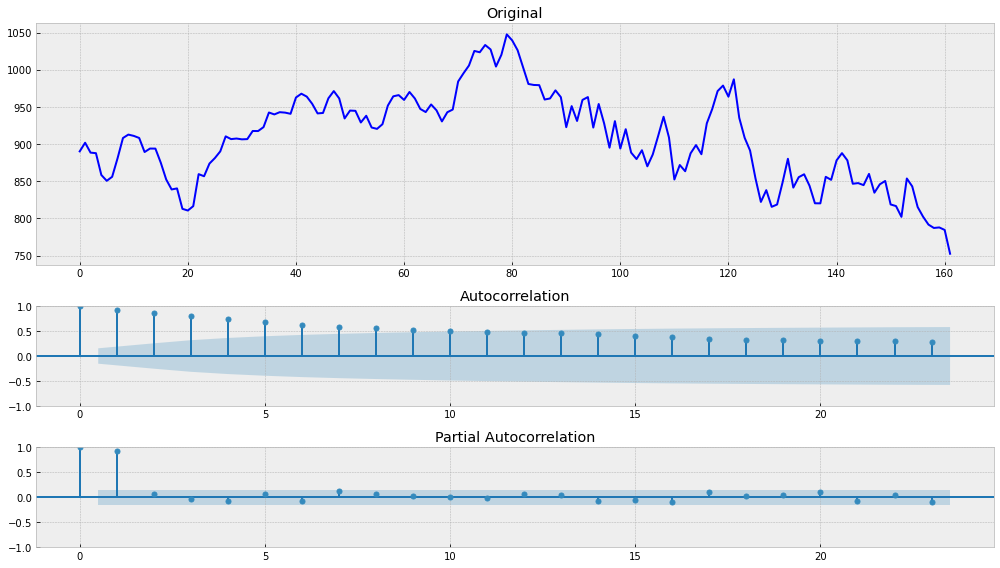

In [44]:
tsplot(all_series["Weekly closings of the Dow-Jones industrial average"])

Ряд "Weekly closings of the Dow-Jones industrial average"- не стационарный, т.к.  тест Dickey-Fuller показывает значение p-value 0.622455 (больше 5%). Визуально наблюдаем тренд и сезонность и циклы. Коррелограмма, так же показывает выходы ACF@ PACF за доверительный интервал и ACF плавно затухают, а PACF имеют два первых выброки и дальше затухание ...

In [136]:
series_5 = pd.read_csv("C:/Users/kuznecov.ap/Desktop/временные ряды/1._Лекция/Series/weekly-closings-of-the-dowjones-.csv")['Close']

Уберем изменение дисперсии при помощи преобразования Бокса-Кокса

C:\Users\kuznecov.ap\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


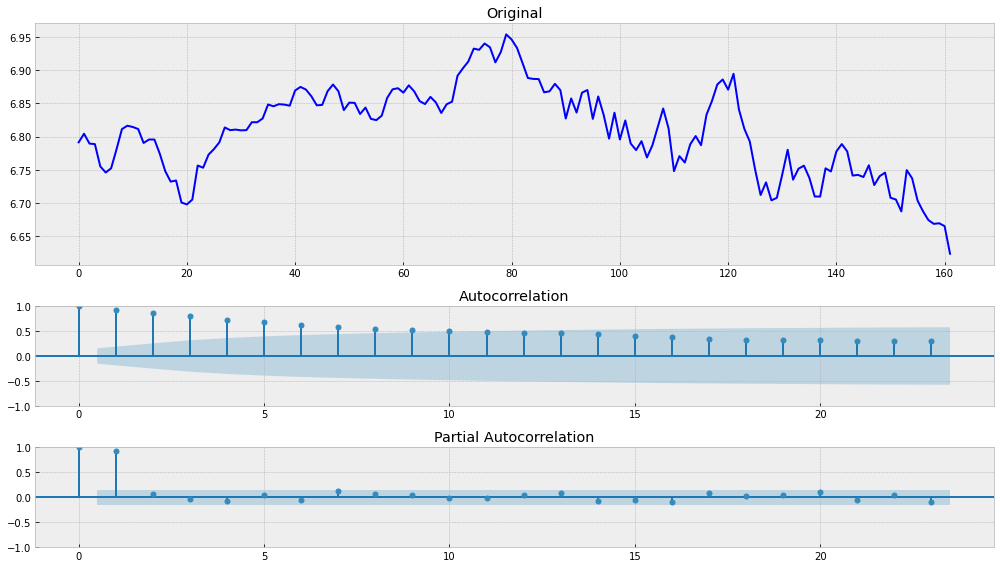

In [137]:
series_5 = boxcox(series_5, 0)
tsplot(series_5)
test_stationarity(series_5)

Убрать разброс дисперсии не удалось!!! Тест Дикки-Фуллера не отвергает нулевую гипотезу о нестационарности ряда. Ряд не стационарен. Проведем  диффефренцирование


C:\Users\kuznecov.ap\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Results of Dickey-Fuller Test:
Test Statistic                -1.298955e+01
p-value                        2.831309e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


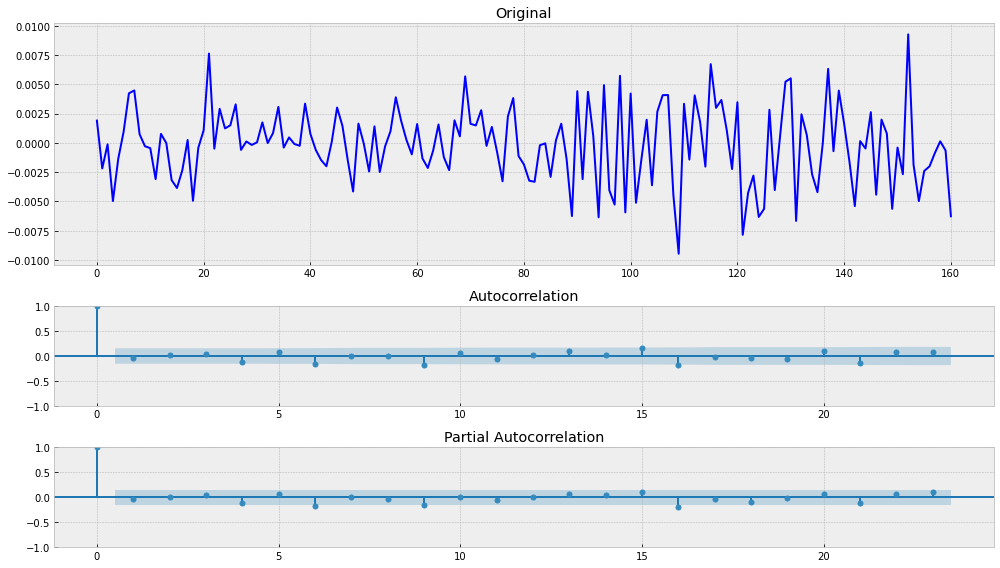

In [135]:
series_5 = np.diff(series_5)
tsplot(series_5)
test_stationarity(series_5)

Тест Дикки-Фуллера отвергает нулевую гипотезу о нестационарности ряда. Ряд стационарен!!!

### 2.6. Ряд "Daily total female births in California"

In [36]:
test_stationarity(all_series["Daily total female births in California"])

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


C:\Users\kuznecov.ap\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


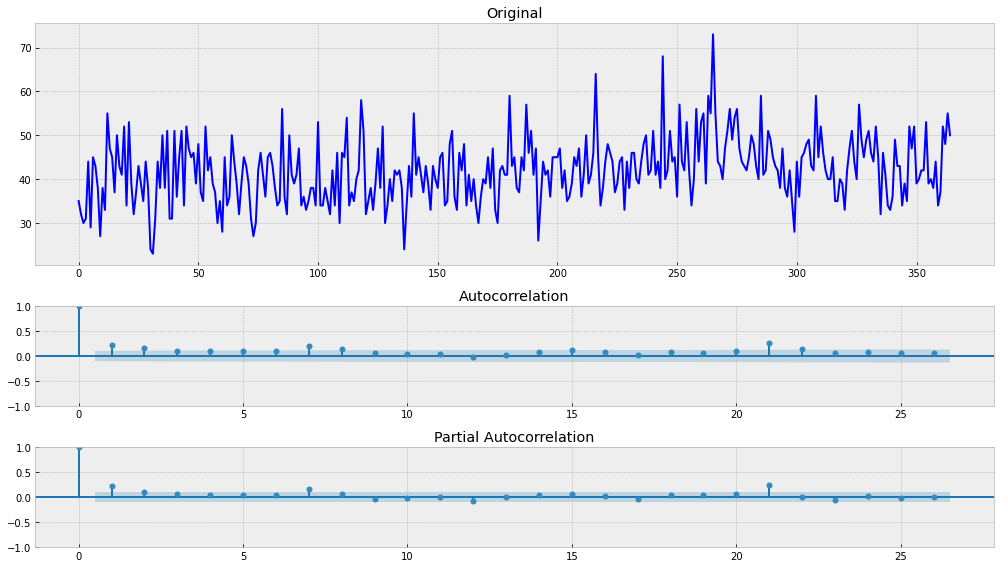

In [45]:
tsplot(all_series["Daily total female births in California"])

Ряд "Daily total female births in California"-  стационарный!!!, т.к.  тест Dickey-Fuller показывает значение p-value 0.000052(что ниже 5%). Визуально нет тренда и сезонности. Коррелограмма показывает ACF@ PACF имеют графики, которые характеризую ряды, как стационарные. Первые выбросы, а дальше идут разбросы в разные стороны от оси.